In [1]:
%%capture

! pip install numpy
! pip install matplotlib
! pip install librosa

# for the use of hmm
!pip install hmmlearn
!pip install features

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip /content/drive/MyDrive/oily_rag.zip

Archive:  /content/drive/MyDrive/oily_rag.zip
   creating: oily_rag/
  inflating: oily_rag/SA2.WAV.wav    


In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.io import wavfile

In [9]:
# load the sample file
sampling_freq, audio = wavfile.read('/content/oily_rag/SA2.WAV.wav')
print('\nShape:', audio.shape)
print('\nDatatype: ', audio.dtype)
print('\nDuration: ', round(audio.shape[0]/float(sampling_freq), 3), 'seconds')


Shape: (32154,)

Datatype:  int16

Duration:  2.01 seconds


In [15]:
# normalize audio data and plot the sample data on the time axis
audio = audio/2.**15
audio = audio[:30] # get the first 30 elements of the array created

x_values = np.arange(0, len(audio), 1)/ float(sampling_freq)

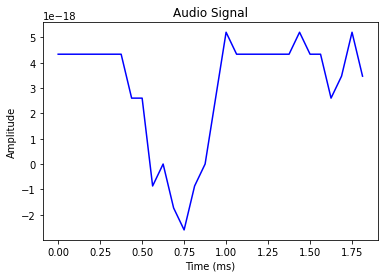

In [22]:
plt.plot(x_values*1000, audio, color="blue")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()

* The above signal is in **time domain**
* `use simple fourier transform to transform it to frequency domain`

In [14]:
audio

array([ 1.42108547e-13,  1.42108547e-13,  1.42108547e-13,  1.42108547e-13,
        1.42108547e-13,  1.42108547e-13,  1.42108547e-13,  8.52651283e-14,
        8.52651283e-14, -2.84217094e-14,  0.00000000e+00, -5.68434189e-14,
       -8.52651283e-14, -2.84217094e-14,  0.00000000e+00,  8.52651283e-14,
        1.70530257e-13,  1.42108547e-13,  1.42108547e-13,  1.42108547e-13,
        1.42108547e-13,  1.42108547e-13,  1.42108547e-13,  1.70530257e-13,
        1.42108547e-13,  1.42108547e-13,  8.52651283e-14,  1.13686838e-13,
        1.70530257e-13,  1.13686838e-13])

#### A Fourie Transform:
1. Breaks a `signal/function/waveform` into alternate representation, characterized by `Sines and Cosines`

2. Fourier gives us a viewing ability of all things that can be represented in a waveform -> Basicalty Everything.

In [17]:
transformed_signal = np.fft.fft(audio)

In [20]:
transformed_signal # forms an array of Real and Im ele1ments - Complex Numbers.

array([ 9.19403442e-17+0.00000000e+00j,  2.15076771e-17+2.31811197e-17j,
       -1.27088646e-18-2.75144605e-17j, -8.48379782e-18+9.46348005e-18j,
        7.95087286e-18-3.43801015e-18j, -4.33680869e-19+5.25810110e-18j,
        4.96954055e-19-7.50527942e-19j, -4.46871018e-18+1.62892867e-18j,
       -1.94546775e-18-2.22892562e-18j,  2.43861311e-19-1.28876181e-18j,
       -3.03576608e-18-3.75578650e-18j,  3.01308145e-18+1.08477025e-18j,
        3.40617377e-18-6.16383992e-18j, -1.02728391e-19+3.11755425e-19j,
        4.69651775e-19+3.77065697e-18j,  3.46944695e-18-1.54074396e-33j,
        4.69651775e-19-3.77065697e-18j, -1.02728391e-19-3.11755425e-19j,
        3.40617377e-18+6.16383992e-18j,  3.01308145e-18-1.08477025e-18j,
       -3.03576608e-18+3.75578650e-18j,  2.43861311e-19+1.28876181e-18j,
       -1.94546775e-18+2.22892562e-18j, -4.46871018e-18-1.62892867e-18j,
        4.96954055e-19+7.50527942e-19j, -4.33680869e-19-5.25810110e-18j,
        7.95087286e-18+3.43801015e-18j, -8.48379782

In [26]:
len_audio = 2.01
half_length = np.ceil((len_audio + 1)/ 2.0)
half_length = int(half_length)
transformed_signal = abs(transformed_signal[0:half_length]) # only get the Real part.
transformed_signal **=2

transformed_signal, half_length

(array([7.14536637e-65, 9.99888975e-67]), 2)